# Setup

Import the necessary packages and show the first five rows of the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Custom functions
def mysubplot():
    fig, ax = plt.subplots(6,2,figsize=(15,25))
    ax = ax.flatten()
    fig.delaxes(ax[-1])
    return (fig,ax)

def class_stats(df,feature,keys):
    left = df[df[feature] == 0].describe()
    right = df[df[feature] == 1].describe()
    label_list = left.index.values
    return pd.concat([left, right], keys=keys).swaplevel(0,1).sort_index().reindex(axis='index', level=0, labels=label_list)

# Make sure the dataset is correctly imported
redwine = pd.read_csv('winequality/winequality-red.csv',delimiter=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


---
# Preprocessing

## Binary Problem

Do a thresholding of the "quality" output variable at the value 5

In [2]:
redwine.quality = redwine.quality.map(lambda quality: int(quality > 5))

redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Statistics
Compute statistics for the two classes

In [3]:
class_stats(redwine,'quality',['bad','good'])

fixed acidity  volatile acidity  citric acid  residual sugar  \
count bad      744.000000        744.000000   744.000000      744.000000   
      good     855.000000        855.000000   855.000000      855.000000   
mean  bad        8.142204          0.589503     0.237755        2.542070   
      good       8.474035          0.474146     0.299883        2.535965   
std   bad        1.572396          0.177956     0.183368        1.393550   
      good       1.862795          0.161999     0.199889        1.424835   
min   bad        4.600000          0.180000     0.000000        1.200000   
      good       4.700000          0.120000     0.000000        0.900000   
25%   bad        7.100000          0.460000     0.080000        1.900000   
      good       7.100000          0.350000     0.115000        1.900000   
50%   bad        7.800000          0.590000     0.220000        2.200000   
      good       8.000000          0.460000     0.310000        2.200000   
75%   bad        8.900000          0.680000     0.360000        2.600000   
      good       9.650000          0.580000     0.460000        2.600000   
max   bad       15.900000          1.580000     1.000000       15.500000   
      good      15.600000          1.040000     0.780000       15.400000   

             chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count bad   744.000000           744.000000            744.000000  744.000000   
      good  855.000000           855.000000            855.000000  855.000000   
mean  bad     0.092989            16.567204             54.645161    0.997068   
      good    0.082661            15.272515             39.352047    0.996467   
std   bad     0.055781            10.890291             36.720468    0.001598   
      good    0.037258            10.038538             27.253280    0.002067   
min   bad     0.039000             3.000000              6.000000    0.992560   
      good    0.012000             1.000000              6.000000    0.990070   
25%   bad     0.074000             8.000000             23.750000    0.996120   
      good    0.067000             7.000000             20.000000    0.995185   
50%   bad     0.081000            14.000000             45.000000    0.996935   
      good    0.077000            13.000000             33.000000    0.996400   
75%   bad     0.094000            23.000000             78.000000    0.997900   
      good    0.087500            20.500000             50.000000    0.997685   
max   bad     0.611000            68.000000            155.000000    1.003150   
      good    0.415000            72.000000            289.000000    1.003690   

                    pH   sulphates     alcohol  quality  
count bad   744.000000  744.000000  744.000000    744.0  
      good  855.000000  855.000000  855.000000    855.0  
mean  bad     3.311653    0.618535    9.926478      0.0  
      good    3.310643    0.692620   10.855029      1.0  
std   bad     0.154296    0.176194    0.758007      0.0  
      good    0.154554    0.155558    1.106109      0.0  
min   bad     2.740000    0.330000    8.400000      0.0  
      good    2.860000    0.390000    8.400000      1.0  
25%   bad     3.200000    0.520000    9.400000      0.0  
      good    3.210000    0.590000   10.000000      1.0  
50%   bad     3.310000    0.580000    9.700000      0.0  
      good    3.310000    0.660000   10.800000      1.0  
75%   bad     3.400000    0.650000   10.300000      0.0  
      good    3.400000    0.770000   11.700000      1.0  
max   bad     3.900000    2.000000   14.900000      0.0  
      good    4.010000    1.950000   14.000000      1.0

### Distribution plots by category

In this section, we will build an intuition about the important features for separating the two classes.
The trace is a [kernel density estimate](https://en.wikipedia.org/wiki/Kernel_density_estimation) built from the histograms.

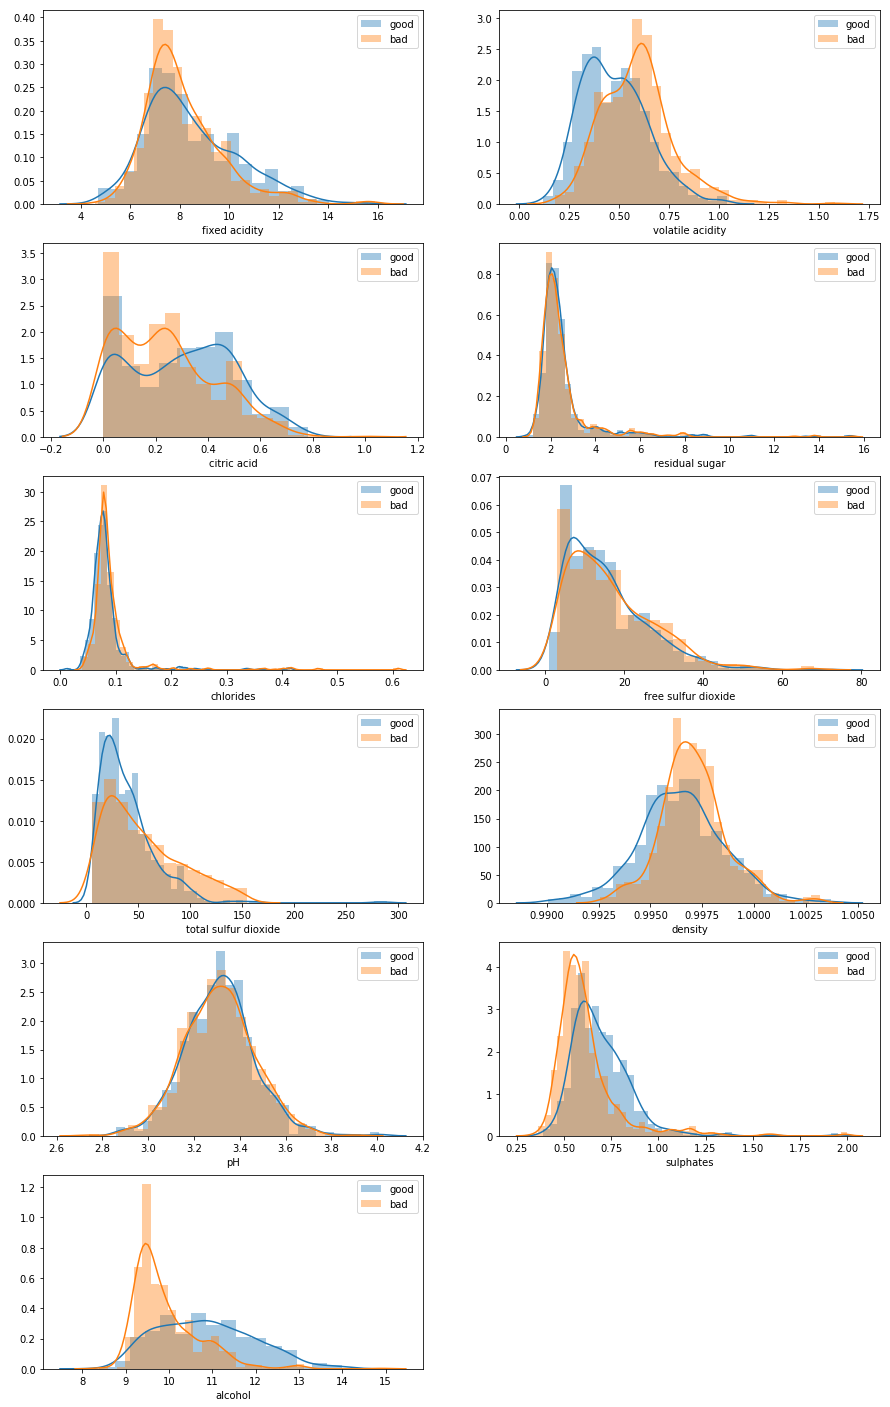

In [4]:
# Histograms for good and bad wines
fig, ax = mysubplot()
for i,feature in enumerate(redwine.columns[:-1]):
    sns.distplot(a=redwine[redwine.quality == 1][feature],label='good',ax=ax[i])
    sns.distplot(a=redwine[redwine.quality == 0][feature],label='bad',ax=ax[i])
    ax[i].legend()

We can already perceive that the features :
   * volatile acidity
   * density
   * sulphates
   * alcohol

have a certain discriminative power, alcohol being a sharp change in the distribution look.

Also, features : 
   * residual sugar
   * chlorides
   * free sulfur dioxide
   * total sulfur dioxide
   * sulphates

have a heavy tailed distribution, maybe an outlier thresholding will be necessary.

It is also important to see that every feature is a positive random variable and the corresonding distributions are not symmetric.

## Removing off the outliers
Looking at the histograms, we choose to apply the following selection criterion :
   * `residual sugar < 8`
   * `chlorides < 0.2`
   * `free sulfur dioxide < 60`
   * `total sulfur dioxide < 200`
   * `sulphates < 1.5`

In [6]:
clean_redwine = redwine[(redwine['residual sugar'] < 8) &
                        (redwine['chlorides'] < 0.2) &
                        (redwine['free sulfur dioxide'] < 60) &
                        (redwine['total sulfur dioxide'] < 200) &
                        (redwine['sulphates'] < 1.5)]

class_stats(clean_redwine,'quality',['bad','good'])

fixed acidity  volatile acidity  citric acid  residual sugar  \
count bad      712.000000        712.000000   712.000000      712.000000   
      good     821.000000        821.000000   821.000000      821.000000   
mean  bad        8.135815          0.590913     0.229719        2.462500   
      good       8.485384          0.474629     0.295859        2.394945   
std   bad        1.586386          0.178663     0.177253        1.033537   
      good       1.880440          0.162936     0.199731        0.874236   
min   bad        4.600000          0.180000     0.000000        1.200000   
      good       4.700000          0.120000     0.000000        0.900000   
25%   bad        7.100000          0.460000     0.080000        1.900000   
      good       7.100000          0.350000     0.100000        1.900000   
50%   bad        7.800000          0.590000     0.215000        2.200000   
      good       8.000000          0.460000     0.310000        2.200000   
75%   bad        8.900000          0.680000     0.340000        2.600000   
      good       9.700000          0.580000     0.460000        2.600000   
max   bad       15.900000          1.580000     0.790000        7.900000   
      good      15.600000          1.040000     0.760000        6.700000   

             chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count bad   712.000000           712.000000            712.000000  712.000000   
      good  821.000000           821.000000            821.000000  821.000000   
mean  bad     0.084289            16.289326             53.942416    0.997033   
      good    0.078210            15.080999             38.140073    0.996418   
std   bad     0.020169            10.369163             36.707920    0.001576   
      good    0.019639             9.631748             23.297621    0.002030   
min   bad     0.039000             3.000000              6.000000    0.992560   
      good    0.012000             1.000000              6.000000    0.990070   
25%   bad     0.074000             8.000000             23.000000    0.996100   
      good    0.066000             7.000000             21.000000    0.995160   
50%   bad     0.081000            14.000000             44.000000    0.996900   
      good    0.077000            13.000000             33.000000    0.996400   
75%   bad     0.092000            23.000000             77.000000    0.997900   
      good    0.086000            20.000000             49.000000    0.997600   
max   bad     0.186000            57.000000            155.000000    1.003150   
      good    0.194000            54.000000            165.000000    1.003200   

                    pH   sulphates     alcohol  quality  
count bad   712.000000  712.000000  712.000000    712.0  
      good  821.000000  821.000000  821.000000    821.0  
mean  bad     3.320070    0.599916    9.949017      0.0  
      good    3.315006    0.687101   10.883739      1.0  
std   bad     0.149077    0.128494    0.759135      0.0  
      good    0.153054    0.136344    1.097332      0.0  
min   bad     2.880000    0.330000    8.500000      0.0  
      good    2.860000    0.390000    8.400000      1.0  
25%   bad     3.220000    0.520000    9.400000      0.0  
      good    3.220000    0.590000   10.000000      1.0  
50%   bad     3.310000    0.570000    9.700000      0.0  
      good    3.310000    0.660000   10.800000      1.0  
75%   bad     3.410000    0.640000   10.300000      0.0  
      good    3.400000    0.770000   11.700000      1.0  
max   bad     3.900000    1.220000   14.900000      0.0  
      good    4.010000    1.360000   14.000000      1.0

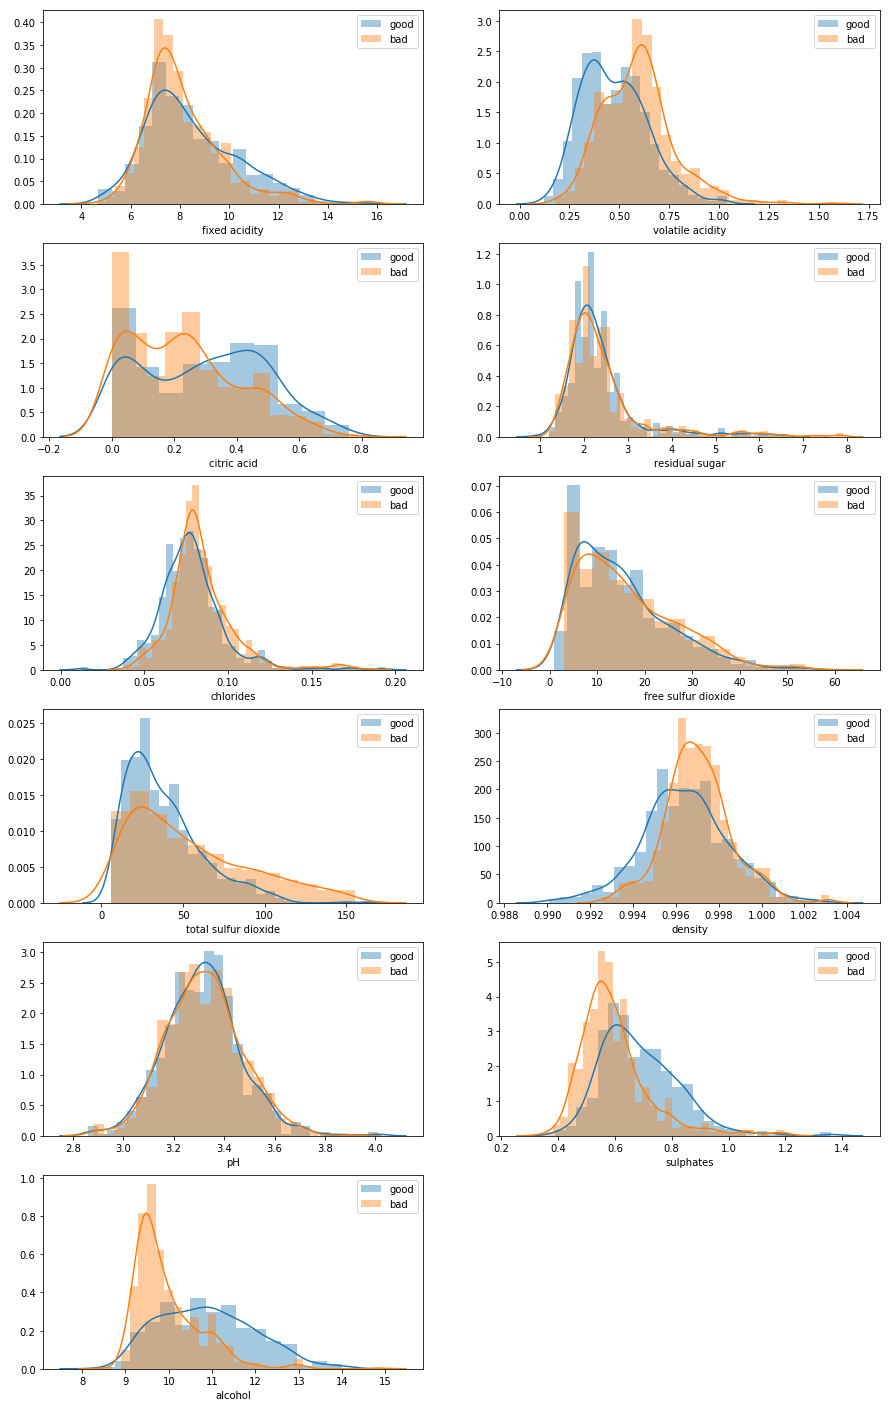

In [9]:
# Histograms for good and bad wines
fig, ax = mysubplot()
for i,feature in enumerate(clean_redwine.columns[:-1]):
    sns.distplot(a=clean_redwine[clean_redwine.quality == 1][feature],label='good',ax=ax[i])
    sns.distplot(a=clean_redwine[clean_redwine.quality == 0][feature],label='bad',ax=ax[i])
    ax[i].legend()

The thresholding has removed a very small portion of the dataset : 32 (5%) for the `bad` class and 34 (4%) for the `good` class.

## Correlation Matrix

We will now center the variables and normalize them to have all variables interracting in the same range.



In [10]:
clean_norm_redwine = (clean_redwine - clean_redwine.mean())/clean_redwine.std()

corr = clean_norm_redwine.corr()
corr.style.background_gradient(cmap='coolwarm',axis = None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,-0.262203,0.695241,0.181416,0.200846,-0.151732,-0.1059,0.679988,-0.709964,0.221545,-0.0540318,0.0991954
volatile acidity,-0.262203,1,-0.562148,0.0568373,0.134249,-0.0149119,0.0934305,0.0211052,0.242791,-0.324182,-0.197945,-0.322351
citric acid,0.695241,-0.562148,1,0.171689,0.091039,-0.0710357,0.0156608,0.382116,-0.530242,0.300697,0.134238,0.17149
residual sugar,0.181416,0.0568373,0.171689,1,0.157783,0.044075,0.124845,0.362849,-0.0904143,0.075111,0.114309,-0.0354087
chlorides,0.200846,0.134249,0.091039,0.157783,1,-0.0155382,0.0883737,0.360939,-0.200348,0.0535774,-0.242319,-0.150827
free sulfur dioxide,-0.151732,-0.0149119,-0.0710357,0.044075,-0.0155382,1,0.670381,-0.0603644,0.0891697,0.0555287,-0.0617038,-0.0603077
total sulfur dioxide,-0.1059,0.0934305,0.0156608,0.124845,0.0883737,0.670381,1,0.0847678,-0.0268035,-0.00977204,-0.229957,-0.25209
density,0.679988,0.0211052,0.382116,0.362849,0.360939,-0.0603644,0.0847678,1,-0.352508,0.167371,-0.485468,-0.165237
pH,-0.709964,0.242791,-0.530242,-0.0904143,-0.200348,0.0891697,-0.0268035,-0.352508,1,-0.0764246,0.183894,-0.0167104
sulphates,0.221545,-0.324182,0.300697,0.075111,0.0535774,0.0555287,-0.00977204,0.167371,-0.0764246,1,0.198975,0.311448


We observe that several variables have some linear correlation :
   * fixed acidity, citric acid and pH : those features are different ways to measure the acid level contained in the wine.
   * free sulfur dioxide and total sulfur dioxide : one of the feature adds up to the other.
   * alcohol and quality : we observed before a tendency for low alcohol wines to be more frequently classified as bad.